## Business Problem
An online retailer wants to optimize profit margin based on visitors intent of purchase. The retailer setting up a personalized customer experience where a visitor who is identified as some one that will make a purchase may not receive a discount. On the other hand a  visitor who is identified as some one that does not intent on purchasing may be offered a promotional discount to incentivize the visitor to make a purchase. 


In [1]:
# Import libraries needed

import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder,MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,f_regression
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix,plot_confusion_matrix 

from xgboost import XGBRFClassifier


%matplotlib inline

In [2]:
# Read 'online_shoppers_intention.csv' file

file = 'data/online_shoppers_intention.csv'
shopper = pd.read_csv(file)
shopper


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [3]:
# Check data types for columns

shopper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [4]:
# Check any colums has any null

shopper.isna().sum()


Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [5]:
# Check whether any record has duplicates

shopper[shopper.duplicated()]



,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
158,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,3,Returning_Visitor,False,False
159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
178,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
418,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,1,1,1,1,Returning_Visitor,True,False
456,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,2,2,4,1,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11934,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,1,2,New_Visitor,False,False
11938,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,4,1,Returning_Visitor,True,False
12159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,1,3,Returning_Visitor,False,False
12180,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,13,9,20,Returning_Visitor,False,False


In [6]:
# Drop all duplicated records

shopper.drop(shopper[shopper.duplicated()].index,inplace=True)
shopper.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 12205 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12205 non-null  int64  
 1   Administrative_Duration  12205 non-null  float64
 2   Informational            12205 non-null  int64  
 3   Informational_Duration   12205 non-null  float64
 4   ProductRelated           12205 non-null  int64  
 5   ProductRelated_Duration  12205 non-null  float64
 6   BounceRates              12205 non-null  float64
 7   ExitRates                12205 non-null  float64
 8   PageValues               12205 non-null  float64
 9   SpecialDay               12205 non-null  float64
 10  Month                    12205 non-null  object 
 11  OperatingSystems         12205 non-null  int64  
 12  Browser                  12205 non-null  int64  
 13  Region                   12205 non-null  int64  
 14  TrafficType           

Column name: Month
May     3329
Nov     2982
Mar     1860
Dec     1706
Oct      549
Sep      448
Aug      433
Jul      432
June     285
Feb      181
Name: Month, dtype: int64


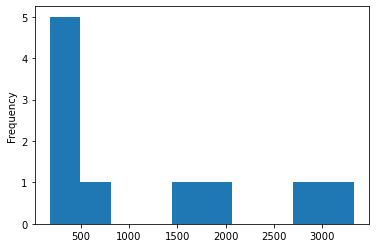

In [7]:
# Identify columns as continous or categorical and spread of data for each feature

# Administrative: categorical value from 0 27, about 5643 records zero 
# Administrative_Duration: continous, about 5778 records with value of zero
# Informational: categorical value from 0 to 16, about 9574 records are zero
# Informational_Duration: continous, about 9800 records are zero
# ProductRelated: continous, max value around 500
# ProductRelated_Duration: continous
# BounceRates: continous, about 5518 records are zero
# ExitRates: continous
# PageValues: continous, about 9475 records are zero
# SpecialDay: categorical, 0, 0.2, 0.4, 0.6, 0.8 and 1, about 10956 records are zero
# Month: categorical, 10 months: Feb,Mar, May, June, Jul, Aug, Sep, Oct, Nov
# OperatingSystems: categorical, about 6541 records have value of 2 (values from 1-8)
# Browser: categorical, about 7883 records have a value of 2 (value from 1-13)
# Region: categorical, (values from 1-9)
# TrafficType: categorical (values fro 1-20)
# VisitorType: categorical, about 10431 records are returning visitors(Returning_visitor, 
#              New_visitor,Other), 
# Weekend: categorical/boolean, about 9346 records weekend false (true or false)
# Revenue: categorical/boolean,target, about 10297 records revenue false (true or false)

column_names = shopper.columns
col_num = 10
print(f'Column name: {column_names[col_num]}')
print(shopper[column_names[col_num]].value_counts())
shopper[column_names[col_num]].value_counts().plot.hist();


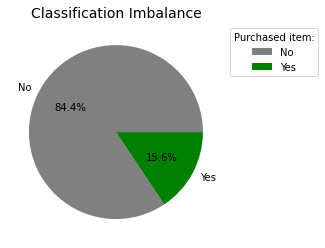

In [8]:
# Show ratios for between purchase and not purchase transaction

fig, axs = plt.subplots()
axs.pie(shopper['Revenue'].value_counts(normalize=True),labels=['No','Yes'],autopct='%1.1f%%',
       colors=['grey','green']);
axs.set_title('Classification Imbalance',fontsize=14)
axs.legend(title='Purchased item:',bbox_to_anchor=(1,1));
#fig.savefig('class_imbalance.jpeg')

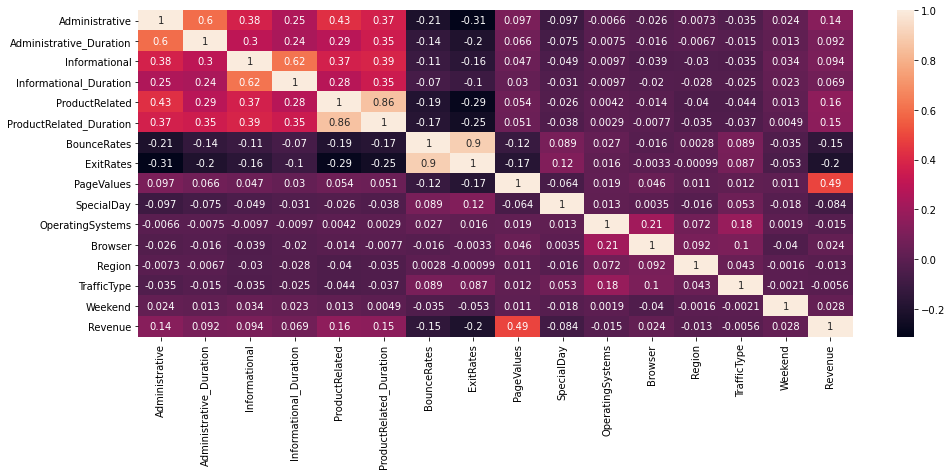

In [9]:
# Check correlation values
# Collinearity between (ProductRelate_Duration,ProductRelated), (ExitRates,BounceRates)

plt.figure(figsize=(16,6))
sns.heatmap(shopper.corr(),annot=True);


In [10]:
# Modify values 'Revenue' column where False is 0 and True is 1

lb = LabelEncoder()
shopper['mod_Revenue'] = lb.fit_transform(shopper['Revenue'])
shopper['mod_Revenue'].value_counts(normalize=True)


0    0.843671
1    0.156329
Name: mod_Revenue, dtype: float64

In [11]:
# Split data into train and test data set
X = shopper.drop(['Revenue','mod_Revenue'],axis=1)
y = shopper['mod_Revenue']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,stratify=y,
                                                    random_state=4321)

In [12]:
# Scale continues and categorical features 
# Setup numerical and categorical pipeline and incorporate both into
# ColumnTransformer


nums_pipe = Pipeline([('ss',StandardScaler())]) # for continous features option # 1
nums_pipe2 = Pipeline([('mm',MinMaxScaler())]) # for continous features option # 2
cats_pipe = Pipeline([('ohe',OneHotEncoder(sparse=False))])

trans = ColumnTransformer([('nums',nums_pipe,list(X_train.select_dtypes(['int64','float64']))),
                          ('cats',cats_pipe,list(X_train.select_dtypes(['bool','object'])))])

trans2 = ColumnTransformer([('nums2',nums_pipe2,list(X_train.select_dtypes(['int64','float64']))),
                          ('cats',cats_pipe,list(X_train.select_dtypes(['bool','object'])))])

X_train_processed = trans.fit_transform(X_train)  # for continous features with StandardScaler
X_test_processed = trans.transform(X_test)

X_train_processed2 = trans2.fit_transform(X_train) # for cobtinous features with MinMaxScaler
X_test_processed2 = trans2.transform(X_test)


In [13]:
# Incorporate processed X_train and X_test into dataframe

num_col_names = trans.transformers_[0][2] 
cat_col_names = ['x0_Aug','x0_Dec', 'x0_Feb', 'x0_Jul', 'x0_June', 'x0_Mar', 'x0_May', 
                 'x0_Nov','x0_Oct', 'x0_Sep', 'x1_New_Visitor', 'x1_Other',
                 'x1_Returning_Visitor', 'x2_False', 'x2_True']

col_names = num_col_names + cat_col_names

X_train_process_df = pd.DataFrame(X_train_processed,columns=col_names,
                                 index=X_train.index)
X_test_process_df = pd.DataFrame(X_test_processed,columns=col_names,
                                index=X_test.index)

X_train_process_df2 = pd.DataFrame(X_train_processed2,columns=col_names,
                                 index=X_train.index)
X_test_process_df2 = pd.DataFrame(X_test_processed2,columns=col_names,
                                index=X_test.index)


In [14]:
# Sort features based specified ranking

def feature_ranking(features,ranking,ascend):
    ranking_list = [(features[i],ranking[i]) for i in range(len(features))]
    rankings_sorted = sorted(ranking_list, key=lambda x: x[1], reverse=ascend)
    return rankings_sorted

# Plot features 

def plot_feature_ranking(rankings,title,scale=None):
    col_names = [name[0] for name in rankings]
    values = [val[1] for val in rankings]
    
    fig, axs = plt.subplots(figsize=(12,8))
    plot = sns.barplot(x=values,y=col_names, orient='h')
    plot.set_title(title)
    plot.set_yticklabels(labels=col_names)
    if scale == 'log': plot.set_xscale('log') 
        

In [15]:
# Feature selection/evaluation based on filter method SelectKBest with f_regression (method # 1)

kbest = SelectKBest(score_func=f_regression,k='all')
fit = kbest.fit(X_train_process_df2,y_train)

kbest_ranking = feature_ranking(X_train_process_df2.columns,fit.scores_,True)


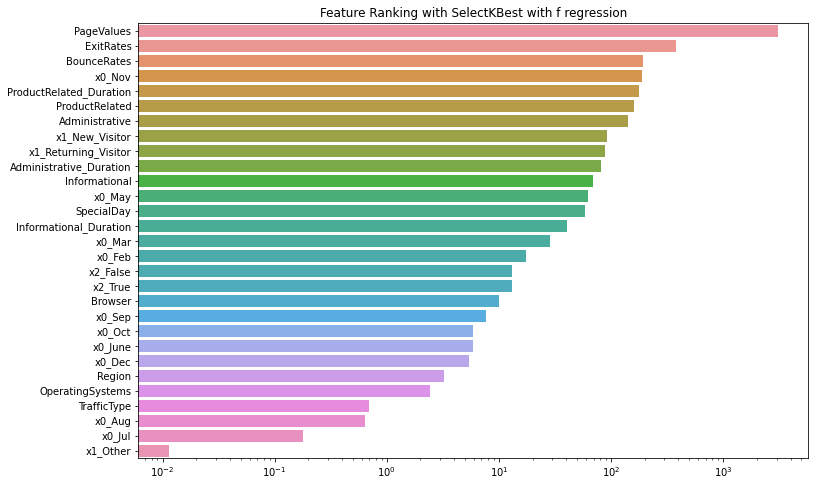

In [16]:
plot_feature_ranking(kbest_ranking,'Feature Ranking with SelectKBest with f regression','log')

Optimal number of features : 2


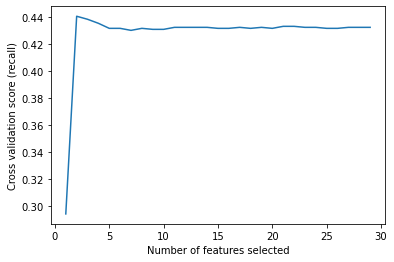

In [17]:
# Feature selection/evaluation based on wrapper method Recursive feature elimination with 
# cross-validation (RFECV) using SVC as estimator (method # 2)

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel='linear',random_state=43)


min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(
    estimator=svc,
    step=1,
    cv=StratifiedKFold(3),
    scoring="recall",
    min_features_to_select=min_features_to_select,
)
rfecv.fit(X_train_process_df, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (recall)")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
);


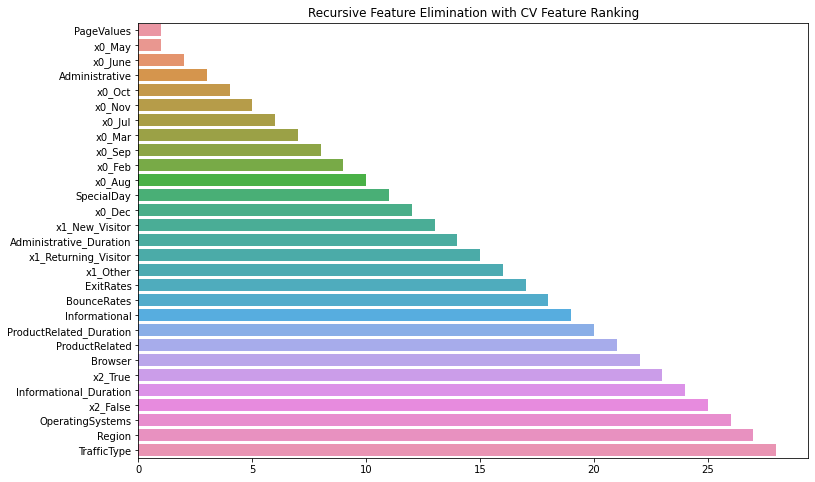

In [18]:
# Feature ranking based RFECV
rfecv_ranking = feature_ranking(X_train_process_df.columns,rfecv.ranking_,False)
plot_feature_ranking(rfecv_ranking,'Recursive Feature Elimination with CV Feature Ranking')

In [19]:
# Feature selection / evaluation based on summation of the absolute values of principal
# component loadings (method # 3)

pca = PCA(n_components=0.9,random_state=44)
pca.fit(X_train_process_df)

loadings = pd.DataFrame(
    data=abs(pca.components_.T) * pca.explained_variance_,
    columns=[f'PC{i}' for i in range(1, len(pca.explained_variance_) + 1)],
    index=X_train_process_df.columns
)

loadings['Abs_Sum'] = loadings.apply(lambda x: x.sum(),axis=1)
loadings.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,Abs_Sum
Administrative,1.306911,0.087848,0.033634,0.251698,0.341420,0.323682,0.019569,0.051066,0.074670,0.013341,0.259254,0.032881,2.795974
Administrative_Duration,1.098764,0.147982,0.040586,0.353993,0.381991,0.444105,0.027981,0.080964,0.103885,0.005097,0.237812,0.022907,2.946068
Informational,1.208820,0.491132,0.052973,0.150456,0.467485,0.052324,0.025914,0.025711,0.036302,0.006720,0.101321,0.022361,2.641517
Informational_Duration,1.003595,0.513488,0.063819,0.158927,0.618819,0.049383,0.030129,0.034139,0.028565,0.008270,0.091619,0.022778,2.623530
ProductRelated,1.406086,0.275269,0.077526,0.384336,0.243425,0.334575,0.020802,0.096352,0.027258,0.018691,0.018865,0.002260,2.905448


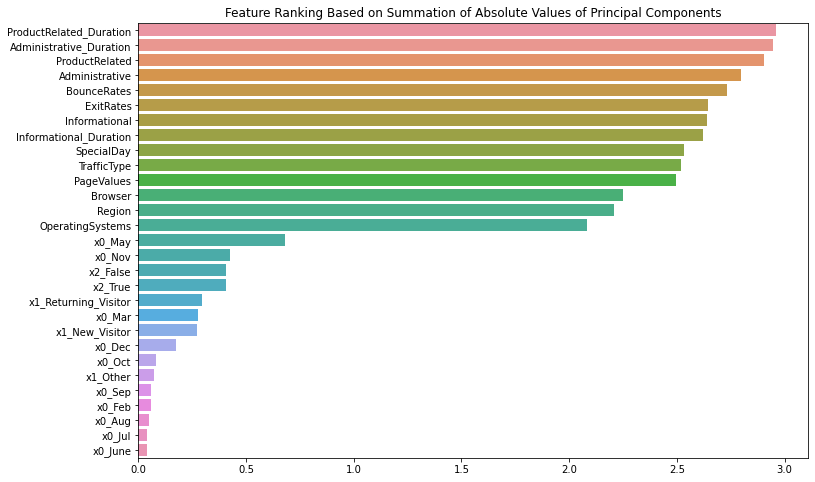

In [20]:
# Feature ranking based on summation of bbsolute values of principal components

pca_ranking = feature_ranking(list(loadings.index),
                              list(loadings['Abs_Sum']),True)

plot_feature_ranking(pca_ranking,
                     'Feature Ranking Based on Summation of Absolute Values of Principal Components')


In [21]:
# Split records whether customer purchased (pos_df) and not purchase (neg_df)
# And keep feature spread between -6 and 6

bool_train_labels = y_train != 0
pos_df = X_train_process_df[ bool_train_labels].clip(-6,6)
neg_df = X_train_process_df[~bool_train_labels].clip(-6,6)

In [22]:

column_names = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'x0_Aug',
       'x0_Dec', 'x0_Feb', 'x0_Jul', 'x0_June', 'x0_Mar', 'x0_May', 'x0_Nov',
       'x0_Oct', 'x0_Sep', 'x1_New_Visitor', 'x1_Other',
       'x1_Returning_Visitor', 'x2_False', 'x2_True']



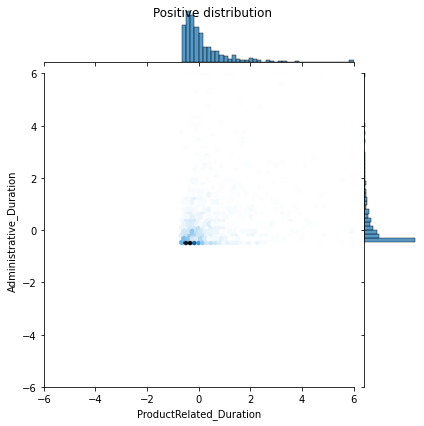

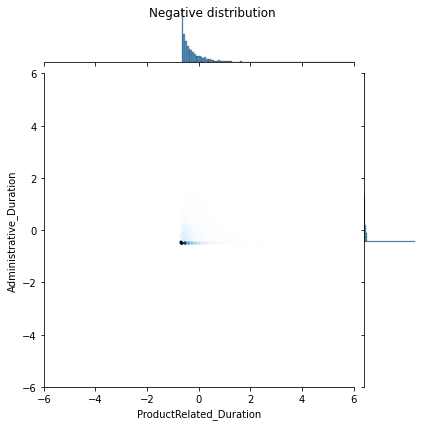

In [23]:
# Look at feature spread for positive(purchase occured) and negative transactions
col1 = column_names[5]
col2 = column_names[1]

sns.jointplot(x=pos_df[col1], y=pos_df[col2],
              kind='hex', xlim=(-6,6), ylim=(-6,6))
plt.suptitle("Positive distribution")

sns.jointplot(x=neg_df[col1], y=neg_df[col2],
              kind='hex', xlim=(-6,6), ylim=(-6,6))
_ = plt.suptitle("Negative distribution")


In [24]:
# Correct for classification imbalance with SMOTE

sm = SMOTE(random_state=41,k_neighbors=3)
X_train_sm, y_train_sm = sm.fit_resample(X_train_process_df, y_train) # StandardScaler
X_train_sm2,y_train_sm2 = sm.fit_resample(X_train_process_df2,y_train) # MinMaxScaler


In [25]:
# Display validation results for train sample

def display_validation_results(results,model_name,train_time):
    v_recall = results['mean_test_recall'].mean()
    v_accuracy = results['mean_test_accuracy'].mean()
    v_precision = results['mean_test_precision'].mean()
    
    print('='*60)
    print(f'Validation results for: {model_name}')
    print(f'Recall: {v_recall}\nAccuracy: {v_accuracy}\nPrecision: {v_precision}')
    stop_time = time.time()
    print(f'\nTraining time for {model_name} took {train_time} seconds.\n')


In [26]:
# Display prediction results for test sample

def display_test_predictions(actuals, predictions, model_name):
    t_recall = recall_score(actuals, predictions)
    t_accuracy = accuracy_score(actuals,predictions)
    t_precision = precision_score(actuals,predictions)
    
    print(f'Test sample predictions result for: {model_name}')
    print(f'Recall: {t_recall}\nAccuracy: {t_accuracy}\nPrecision: {t_precision}\n')
    

In [27]:
# Display confusion matrix and ROC plot

def display_plots(y_actuals,y_predictions,model_name,model_list):
    
    conf_matrix = confusion_matrix(y_actuals, y_predictions)
    
    fig, (ax1,ax2) = plt.subplots(2,1,figsize=(10,10))
    
    
    ax1.matshow(conf_matrix, cmap=plt.cm.Greens, alpha=0.3)
    
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax1.text(x=j,y=i, s=conf_matrix[i, j],va='center',ha='center',size='xx-large')
 
    ax1.set_xlabel('Predictions',fontsize=12)
    ax1.set_ylabel('Actuals',fontsize=12)
    ax1.xaxis.set_ticks_position('bottom')
    ax1.set_title(f'Confusion Matrix for: {model_name}',fontsize=14);
       
    
    model_names = [model[2] for model in model_list]
    
    if model_name not in model_names:
        model_list.append((y_actuals,y_predictions,model_name))
    
    for model in model_list:
        fpr, tpr, _ = metrics.roc_curve(model[0], model[1])
        auc = metrics.roc_auc_score(model[0], model[1])
        name_auc = model[2] + ' AUC: ' + format(auc,'0.2f')          
        ax2.plot(fpr,tpr,label=name_auc)
        ax2.set_title('ROC Plot',fontsize=14)
        ax2.set_xlabel('False Positive Rate',fontsize=12)
        ax2.set_ylabel('True Positive Rate',fontsize=12)
        ax2.legend()
        
    plt.tight_layout(pad=1.1)  
    plt.show()

In [28]:
# Call functions to show validation and prediction results and also display visuals like
# confusion matrix and ROC cuve

def show_results(model,model_name,train_time,y_actuals,y_predictions,model_list):
    display_validation_results(model.cv_results_,model_name,train_time)
    display_test_predictions(y_actuals, y_predictions, model_name)
    display_plots(y_actuals,y_predictions,model_name,model_list)
    

In [29]:
# DummyClassifier
# Create a pipe for base model and incorporate it into gridsearchcv
# Train model with SMOTE classification corrected data

start = time.time()


base_grid_search = GridSearchCV(estimator=DummyClassifier(),
                                param_grid= {'random_state' : [1234],
                                            'strategy' : ['prior']},
                                refit='recall', 
                                scoring=['recall','accuracy','precision'])

# Train model and predict for test samples
base_grid_search.fit(X_train_sm,y_train_sm)
base_y_test_pred = base_grid_search.predict(X_test_process_df)
model_name = 'DummyClassifier'

stop = time.time()

/Users/ahmadsamiee/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Validation results for: DummyClassifier
Recall: 0.4
Accuracy: 0.49986125563648975
Precision: 0.1999306278182449

Training time for DummyClassifier took 0.045371294021606445 seconds.

Test sample predictions result for: DummyClassifier
Recall: 0.0
Accuracy: 0.843801201529219
Precision: 0.0



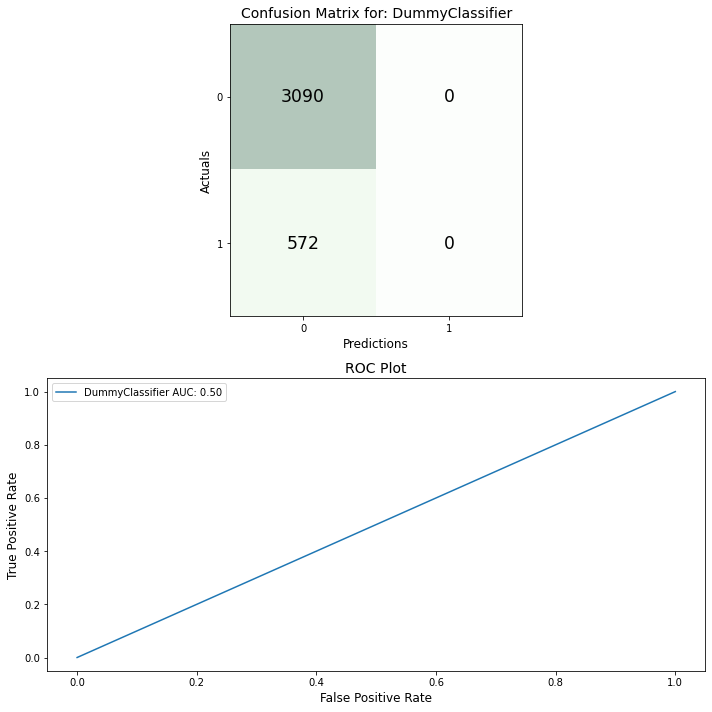

In [30]:
# Display results

models = []
show_results(base_grid_search,
             model_name,
             stop-start,
             y_test,
             base_y_test_pred,
             models)


In [31]:
# MultinomialNB
# Create a pipe for MultinomialNB and incorporate it into gridsearchcv
# Train model with SMOTE classification corrected data

start = time.time()


mn_grid_search = GridSearchCV(estimator=MultinomialNB(),
                                param_grid= {'alpha' : [1.0]},
                                refit='recall', 
                                scoring=['recall','accuracy','precision'])

# Train model
mn_grid_search.fit(X_train_sm2,y_train_sm2) # X_train_process2_df is scaled with min_max
model_name2 = 'MultinomialNB'

stop = time.time()


Validation results for: MultinomialNB
Recall: 0.7388647889574296
Accuracy: 0.6871091706798786
Precision: 0.6697390364037293

Training time for MultinomialNB took 0.0739140510559082 seconds.

Test sample predictions result for: MultinomialNB
Recall: 0.756993006993007
Accuracy: 0.6572910977607864
Precision: 0.27953518398967075



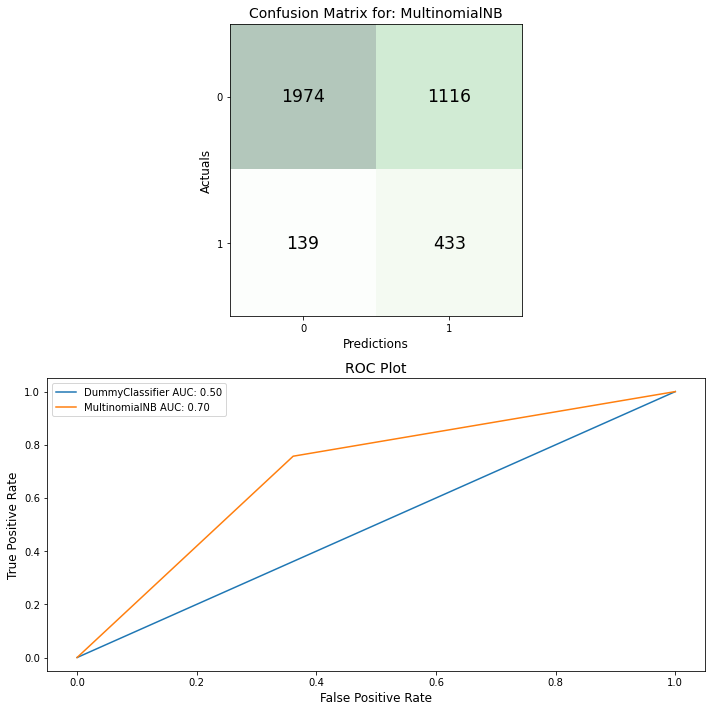

In [32]:
# Predict for X_test samples and display results

mn_y_test_pred = mn_grid_search.predict(X_test_process_df2)

show_results(mn_grid_search,
             model_name2,
             stop-start,
             y_test,
             mn_y_test_pred,
             models)


In [33]:
# LogisticRegression with SMOTE sample balance
# Create a pipe for LogisticRegression and incorporate it into gridsearchcv
# Train model with SMOTE classification corrected data

start = time.time()

lr_grid_search = GridSearchCV(estimator=LogisticRegression(),
                                param_grid= {'random_state' : [2345],
                                            'C': [1,100,1000],  
                                            'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
                                            'max_iter' : [1000,5000]},
                                refit='recall', 
                                scoring=['recall','accuracy','precision'])

# Train model
lr_grid_search.fit(X_train_sm,y_train_sm)
model_name3 = 'LogisticRegression'

stop = time.time()


In [34]:
lr_grid_search.best_params_

{'C': 1, 'max_iter': 1000, 'random_state': 2345, 'solver': 'newton-cg'}

Validation results for: LogisticRegression
Recall: 0.787570787867238
Accuracy: 0.8274059032469085
Precision: 0.8558218355292216

Training time for LogisticRegression took 11.918544054031372 seconds.

Test sample predictions result for: LogisticRegression
Recall: 0.75
Accuracy: 0.84598580010923
Precision: 0.5047058823529412



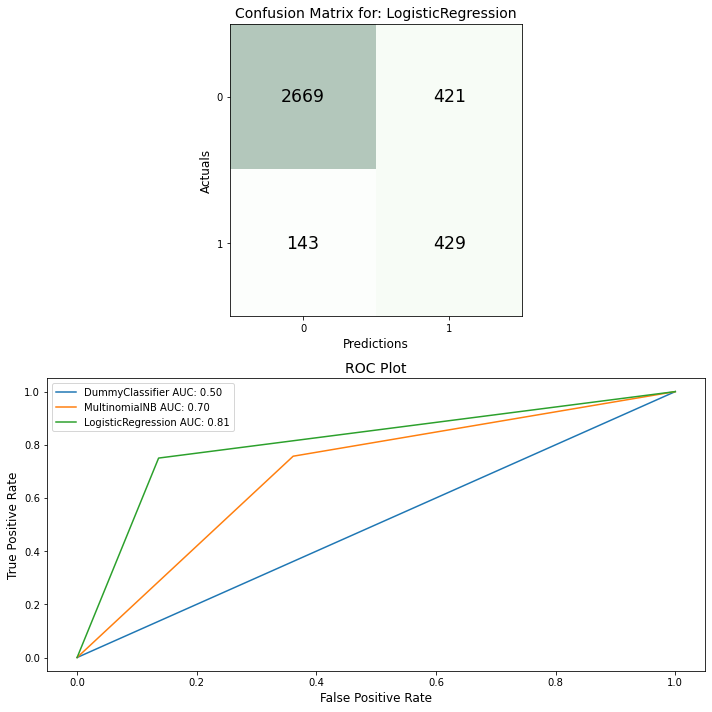

In [35]:
# Predict for X_test samples and display results

lr_y_test_pred = lr_grid_search.predict(X_test_process_df)


show_results(lr_grid_search,
             model_name3,
             stop-start,
             y_test,
             lr_y_test_pred,
             models)

In [36]:
# MLPClassifier with SMOTE sample balance
# Create a pipe for MLPClassifier and incorporate it into gridsearchcv
# Train model with SMOTE classification corrected data

start = time.time()

mlp_grid_search = GridSearchCV(estimator=MLPClassifier(),
                                param_grid= {'random_state' : [6786],
                                             'hidden_layer_sizes' : [(5,3)], # tried (300,150,50),(10,3),(300,),(600,),(100,)
                                             'activation' : ['relu'],  # tried 'identity', 'logistic', 'tanh', 'relu'
                                             'max_iter' : [2000],
                                             'solver' : ['adam'], # tried 'lbfgs', 'sgd', 'adam'
                                             'alpha' : [0.0001], # tried 0.0001, 0.001
                                             'learning_rate' : ['constant'] # tried 'constant', 'invscaling', 'adaptive'
                                             },
                                refit='recall', 
                                scoring=['recall','accuracy','precision'])

# Train model
mlp_grid_search.fit(X_train_sm,y_train_sm)
model_name4 = 'MLPClassifier'

stop = time.time()


In [37]:

mlp_grid_search.best_params_

{'activation': 'relu',
 'alpha': 0.0001,
 'hidden_layer_sizes': (5, 3),
 'learning_rate': 'constant',
 'max_iter': 2000,
 'random_state': 6786,
 'solver': 'adam'}

Validation results for: MLPClassifier
Recall: 0.8991298037173678
Accuracy: 0.8758153939326542
Precision: 0.859220131938482

Training time for MLPClassifier took 82.30925631523132 seconds.

Test sample predictions result for: MLPClassifier
Recall: 0.8321678321678322
Accuracy: 0.8547241944292736
Precision: 0.5219298245614035



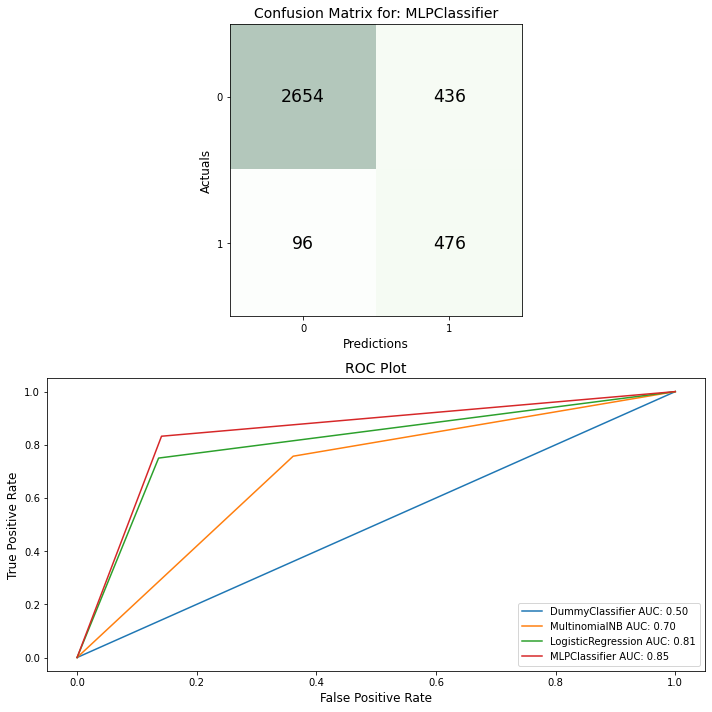

In [38]:
mlp_y_test_pred = mlp_grid_search.predict(X_test_process_df)

show_results(mlp_grid_search,
             model_name4,
             stop-start,
             y_test,
             mlp_y_test_pred,
             models)

In [39]:
# XGBRFClassifier
# Create a pipe for XGBoostClassifier and incorporate it into gridsearchcv
# Train model with SMOTE classification corrected data

start = time.time()

xgbrf_grid_search_1 = GridSearchCV(estimator=XGBRFClassifier(),
                                param_grid= {'random_state' : [2345],
                                             'n_estimators' : [100],  # tried 10,100,1000
                                             'max_depth' : [3],  # tried 3,11,21,31
                                             'subsample' : [0.5], # tried 0. and 1
                                             'learning_rate' : [0.5],  # tried 0.5 and 1
                                             'lambda' : [1], # tied 1 and 10
                                             'gamma' : [1],   # tried 1nd 10
                                             'subsample' : [1],
                                             'max_delta_step' : [0.6],
                                             'colsample_bytree' : [0.5], # 0.5 gives a recall of 0.99
                                             'scale_pos_weight' : [1]
                                            },
                                refit='recall', 
                                scoring=['recall','accuracy','precision'])

# Train model
xgbrf_grid_search_1.fit(X_train_sm,y_train_sm)
model_name5 = 'XGBRFClassifier'

stop = time.time()


In [40]:

xgbrf_grid_search_1.best_params_

{'colsample_bytree': 0.5,
 'gamma': 1,
 'lambda': 1,
 'learning_rate': 0.5,
 'max_delta_step': 0.6,
 'max_depth': 3,
 'n_estimators': 100,
 'random_state': 2345,
 'scale_pos_weight': 1,
 'subsample': 1}

Validation results for: XGBRFClassifier
Recall: 0.8722130089579879
Accuracy: 0.8776196002169264
Precision: 0.8816967287950425

Training time for XGBRFClassifier took 3.285482883453369 seconds.

Test sample predictions result for: XGBRFClassifier
Recall: 0.798951048951049
Accuracy: 0.8705625341343528
Precision: 0.5600490196078431



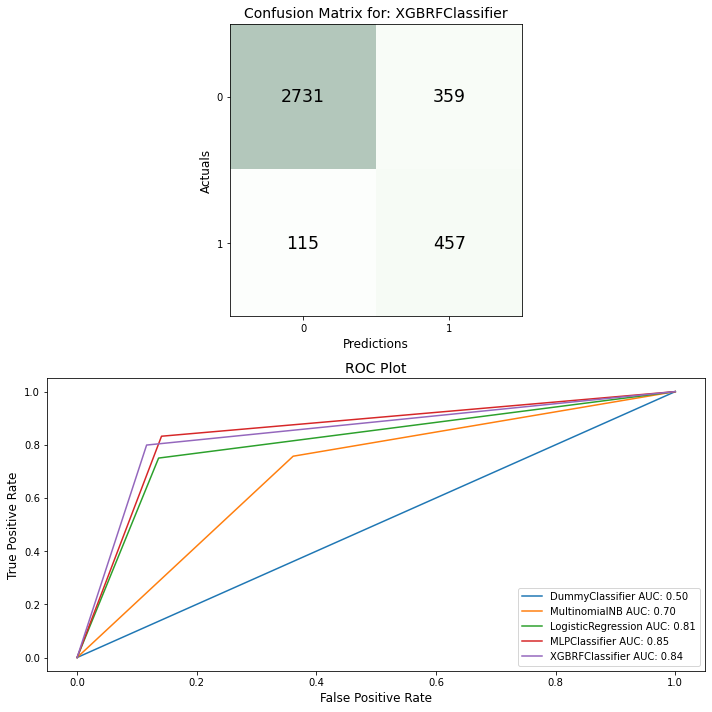

In [41]:
xgbrf_y_test_pred_1 = xgbrf_grid_search_1.predict(X_test_process_df)

xgbrf_models = [(y_test,xgbrf_y_test_pred_1,model_name5)]

show_results(xgbrf_grid_search_1,
             model_name5,
             stop-start,
             y_test,
             xgbrf_y_test_pred_1,
             models)

#### changing scale_pos_weight 
1   ==> recall ~ 0.54 when colsample_bytree = 1

5.4 ==> recall ~ 0.8  when colsample_bytree = 1
5.4 ==> recall ~ 0.81  when colsample_bytree = 0.5
5.4 ==> recall ~ 0.84  when colsample_bytree = 0.2

8.0 ==> recall ~ 0.86 when colsample_bytree = 1

11  ==> recall ~ 0.87 when colsample_bytree = 1
11  ==> recall ~ 0.92 when colsample_bytree = 0.5

15  ==> recall ~ 0.96 when colsample_bytree = 0.5

In [42]:
# XGBRFClassifier
# Adjusted for classification imbalance through scale_pos_weight hyperparameter
# Create a pipe for XGBoostClassifier and incorporate it into gridsearchcv
# Tranin model imbalanced dataset (X_train_process_df)

start = time.time()

xgbrf_grid_search_2 = GridSearchCV(estimator=XGBRFClassifier(),
                                param_grid= {'random_state' : [2345],
                                             'n_estimators' : [100],  # tried 10,100,1000
                                             'max_depth' : [3],  # tried 3,11,21,31
                                             'subsample' : [0.5], # tried 0. and 1
                                             'learning_rate' : [0.5],  # tried 0.5 and 1
                                             'lambda' : [1], # tied 1 and 10
                                             'gamma' : [1],   # tried 1nd 10
                                             'subsample' : [1],
                                             'max_delta_step' : [0.6],
                                             'colsample_bytree' : [0.5], # 0.5 gives a recall of 0.99
                                             'scale_pos_weight' : [11]
                                            },
                                refit='recall', 
                                scoring=['recall','accuracy','precision'])

# Train model
xgbrf_grid_search_2.fit(X_train_process_df,y_train)
model_name6 = 'XGBRFClassifier_v2'

stop = time.time()


In [43]:

xgbrf_grid_search_2.best_params_



{'colsample_bytree': 0.5,
 'gamma': 1,
 'lambda': 1,
 'learning_rate': 0.5,
 'max_delta_step': 0.6,
 'max_depth': 3,
 'n_estimators': 100,
 'random_state': 2345,
 'scale_pos_weight': 11,
 'subsample': 1}

Validation results for: XGBRFClassifier_v2
Recall: 0.9214181899491306
Accuracy: 0.7415442148811294
Precision: 0.3695561792604274

Training time for XGBRFClassifier_v2 took 2.8099231719970703 seconds.

Test sample predictions result for: XGBRFClassifier_v2
Recall: 0.9213286713286714
Accuracy: 0.7329328235936646
Precision: 0.36095890410958903



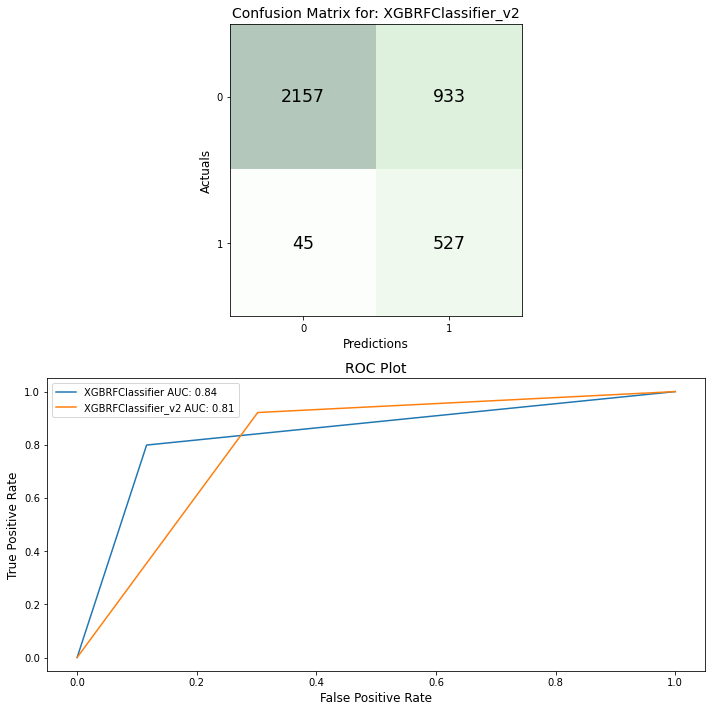

In [44]:
xgbrf_y_test_pred_2 = xgbrf_grid_search_2.predict(X_test_process_df)

show_results(xgbrf_grid_search_2,
             model_name6,
             stop-start,
             y_test,
             xgbrf_y_test_pred_2,
             xgbrf_models)

In [45]:
print(xgbrf_grid_search_2.best_estimator_.feature_importances_)
xgbrf_grid_search_2.best_estimator_.importance_type
a = xgbrf_grid_search_2.best_estimator_.feature_importances_


[1.1792856e-02 1.6991744e-02 9.5587149e-03 6.8367068e-03 3.7625372e-02
 6.7943543e-02 5.8727872e-02 1.1878412e-01 4.7401905e-01 1.0650979e-02
 1.5354035e-03 1.6545551e-03 9.1509959e-03 6.4739296e-03 4.5184622e-04
 0.0000000e+00 4.9052201e-03 3.8575542e-03 0.0000000e+00 1.2145539e-02
 1.3844521e-02 7.1116626e-02 1.0990876e-02 6.7846179e-03 2.2596654e-02
 0.0000000e+00 1.7334964e-02 4.2257369e-03 0.0000000e+00]


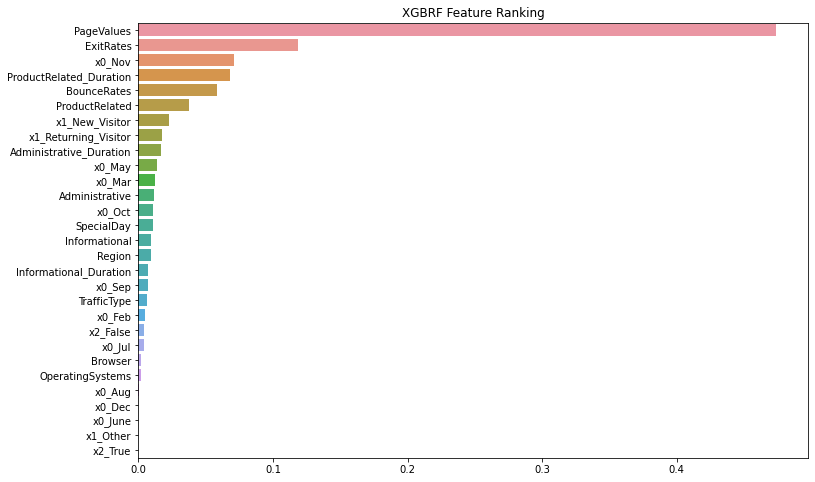

In [46]:
xgbrf_ranking = feature_ranking(X_train_process_df.columns,
                                xgbrf_grid_search_2.best_estimator_.feature_importances_,True)
plot_feature_ranking(xgbrf_ranking,'XGBRF Feature Ranking')

In [47]:

xgbrf_ranking

[('PageValues', 0.47401905),
 ('ExitRates', 0.11878412),
 ('x0_Nov', 0.071116626),
 ('ProductRelated_Duration', 0.06794354),
 ('BounceRates', 0.05872787),
 ('ProductRelated', 0.037625372),
 ('x1_New_Visitor', 0.022596654),
 ('x1_Returning_Visitor', 0.017334964),
 ('Administrative_Duration', 0.016991744),
 ('x0_May', 0.013844521),
 ('x0_Mar', 0.012145539),
 ('Administrative', 0.011792856),
 ('x0_Oct', 0.010990876),
 ('SpecialDay', 0.010650979),
 ('Informational', 0.009558715),
 ('Region', 0.009150996),
 ('Informational_Duration', 0.006836707),
 ('x0_Sep', 0.006784618),
 ('TrafficType', 0.0064739296),
 ('x0_Feb', 0.00490522),
 ('x2_False', 0.004225737),
 ('x0_Jul', 0.0038575542),
 ('Browser', 0.0016545551),
 ('OperatingSystems', 0.0015354035),
 ('x0_Aug', 0.00045184622),
 ('x0_Dec', 0.0),
 ('x0_June', 0.0),
 ('x1_Other', 0.0),
 ('x2_True', 0.0)]

In [48]:
# XGBRFClassifier
# Adjusted for classification imbalance through scale_pos_weight hyperparameter 
# Gives highest recall when scale_pos_weight set at 27
# Create a pipe for XGBoostClassifier and incorporate it into gridsearchcv
# Tranin model imbalanced dataset (X_train_process_df)

start = time.time()

xgbrf_grid_search_3 = GridSearchCV(estimator=XGBRFClassifier(),
                                param_grid= {'random_state' : [2345],
                                             'n_estimators' : [100],  # tried 10,100,1000
                                             'max_depth' : [3],  # tried 3,11,31
                                             'subsample' : [0.5], # tried 0. and 1
                                             'learning_rate' : [0.5],  # tried 0.5 and 1
                                             'lambda' : [1], # tied 1 and 10
                                             'gamma' : [1],   # tried 1nd 10 
                                             'subsample' : [1],
                                             'max_delta_step' : [0.6],
                                             'colsample_bytree' : [0.5],
                                             'scale_pos_weight' : [27]
                                            },
                                refit='recall', 
                                scoring=['recall','accuracy','precision'])

# Train model
xgbrf_grid_search_3.fit(X_train_process_df,y_train)
model_name7 = 'XGBRFClassifier_v3'

stop = time.time()


In [49]:

xgbrf_grid_search_3.best_params_

{'colsample_bytree': 0.5,
 'gamma': 1,
 'lambda': 1,
 'learning_rate': 0.5,
 'max_delta_step': 0.6,
 'max_depth': 3,
 'n_estimators': 100,
 'random_state': 2345,
 'scale_pos_weight': 27,
 'subsample': 1}

Validation results for: XGBRFClassifier_v3
Recall: 0.9932640169936832
Accuracy: 0.32038162750447763
Precision: 0.18638909116988134

Training time for XGBRFClassifier_v3 took 1.70461106300354 seconds.

Test sample predictions result for: XGBRFClassifier_v3
Recall: 0.9982517482517482
Accuracy: 0.3230475150191152
Precision: 0.1872745162348311



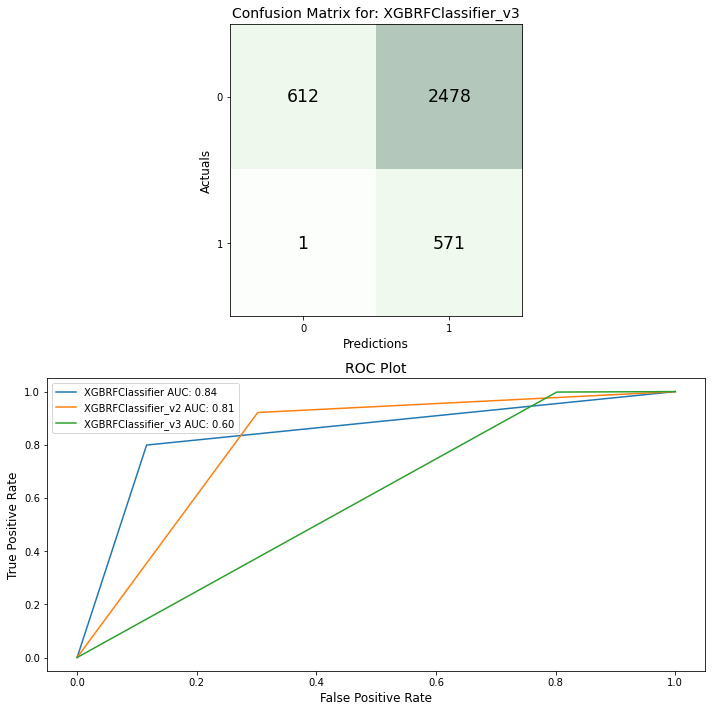

In [50]:
xgbrf_y_test_pred_3 = xgbrf_grid_search_3.predict(X_test_process_df)

show_results(xgbrf_grid_search_3,
             model_name7,
             stop-start,
             y_test,
             xgbrf_y_test_pred_3,
             xgbrf_models)

In [51]:
# Select 17 top features based on XGBRFClassifier feature importance ranking
# and then train model with these features only
select_columns = [xgbrf_ranking[i][0] for i in range(17)]
select_train_df = X_train_process_df[select_columns].copy()
select_test_df = X_test_process_df[select_columns].copy()

In [52]:
# XGBRFClassifier
# Adjusted for classification imbalance through scale_pos_weight hyperparameter
# Create a pipe for XGBoostClassifier and incorporate it into gridsearchcv
# Tranin model imbalanced dataset (select_train_df)

start = time.time()

xgbrf_grid_search_4 = GridSearchCV(estimator=XGBRFClassifier(),
                                param_grid= {'random_state' : [2345],
                                             'n_estimators' : [100],  # tried 10,100,1000
                                             'max_depth' : [3],  # tried 3,11,21,31
                                             'subsample' : [0.5], # tried 0. and 1
                                             'learning_rate' : [0.5],  # tried 0.5 and 1
                                             'lambda' : [1], # tied 1 and 10
                                             'gamma' : [1],   # tried 1nd 10
                                             'subsample' : [1],
                                             'max_delta_step' : [0.6],
                                             'colsample_bytree' : [0.5], # 0.5 gives a recall of 0.99
                                             'scale_pos_weight' : [11]
                                            },
                                refit='recall', 
                                scoring=['recall','accuracy','precision'])

# Train model
xgbrf_grid_search_4.fit(select_train_df,y_train)
model_name8 = 'XGBRFClassifier_v4'

stop = time.time()


Validation results for: XGBRFClassifier_v4
Recall: 0.940128011627257
Accuracy: 0.5677173333625675
Precision: 0.2580055168097234

Training time for XGBRFClassifier_v4 took 1.5069379806518555 seconds.

Test sample predictions result for: XGBRFClassifier_v4
Recall: 0.9475524475524476
Accuracy: 0.557618787547788
Precision: 0.25422138836772984



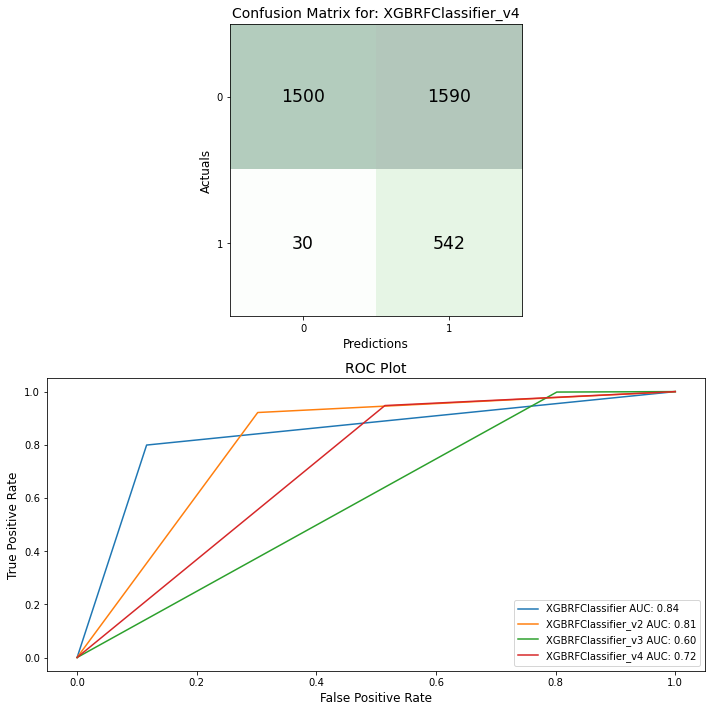

In [53]:
xgbrf_y_test_pred_4 = xgbrf_grid_search_4.predict(select_test_df)

show_results(xgbrf_grid_search_4,
             model_name8,
             stop-start,
             y_test,
             xgbrf_y_test_pred_4,
             xgbrf_models)